In [1]:
import meep as mp
import matplotlib.pyplot as plt

Using MPI version 4.0, 1 processes


In [2]:
resolution = 25   # pixels/μm

w1 = 1.0          # width of waveguide 1
w2 = 2.0          # width of waveguide 2
Lw = 10.0         # length of waveguides 1 and 2

# lengths of waveguide taper
Lts = [2**m for m in range(4)]

dair = 3.0        # length of air region
dpml_x = 6.0      # length of PML in x direction
dpml_y = 2.0      # length of PML in y direction

sy = dpml_y+dair+w2+dair+dpml_y

Si = mp.Medium(epsilon=12.0)

boundary_layers = [mp.PML(dpml_x,direction=mp.X),
                   mp.PML(dpml_y,direction=mp.Y)]

lcen = 6.67       # mode wavelength
fcen = 1/lcen     # mode frequency

symmetries = [mp.Mirror(mp.Y)]

R_coeffs = []
R_flux = []

Single run

In [3]:
Lt = 2

sx = dpml_x+Lw+Lt+Lw+dpml_x
cell_size = mp.Vector3(sx,sy,0)

src_pt = mp.Vector3(-0.5*sx+dpml_x+0.2*Lw)
sources = [mp.EigenModeSource(src=mp.GaussianSource(fcen,fwidth=0.2*fcen),
                                center=src_pt,
                                size=mp.Vector3(y=sy-2*dpml_y),
                                eig_match_freq=True,
                                eig_parity=mp.ODD_Z+mp.EVEN_Y)]

# straight waveguide
vertices = [mp.Vector3(-0.5*sx-1,0.5*w1),
            mp.Vector3(0.5*sx+1,0.5*w1),
            mp.Vector3(0.5*sx+1,-0.5*w1),
            mp.Vector3(-0.5*sx-1,-0.5*w1)]

sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=boundary_layers,
                    geometry=[mp.Prism(vertices,height=mp.inf,material=Si)],
                    sources=sources,
                    symmetries=symmetries)

mon_pt = mp.Vector3(-0.5*sx+dpml_x+0.7*Lw)
flux = sim.add_flux(fcen,0,1,mp.FluxRegion(center=mon_pt,size=mp.Vector3(y=sy-2*dpml_y)))

     prism, center = (0,0,5e+19)
          height 1e+20, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (-18,0.5,0)
          (18,0.5,0)
          (18,-0.5,0)
          (-18,-0.5,0)
          dielectric constant epsilon diagonal = (12,12,12)


/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


<AxesSubplot:xlabel='X', ylabel='Y'>

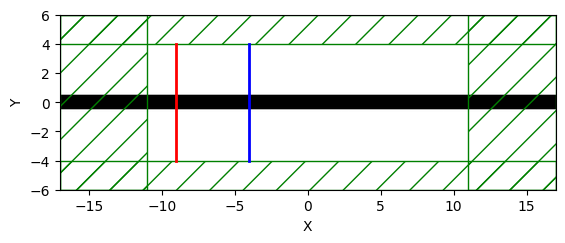

In [4]:
sim.plot2D()

In [5]:
sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,mon_pt,1e-9))

res = sim.get_eigenmode_coefficients(flux,[1],eig_parity=mp.ODD_Z+mp.EVEN_Y)
incident_coeffs = res.alpha
incident_flux = mp.get_fluxes(flux)
incident_flux_data = sim.get_flux_data(flux)

sim.reset_meep()

# linear taper
vertices = [mp.Vector3(-0.5*sx-1,0.5*w1),
            mp.Vector3(-0.5*Lt,0.5*w1),
            mp.Vector3(0.5*Lt,0.5*w2),
            mp.Vector3(0.5*sx+1,0.5*w2),
            mp.Vector3(0.5*sx+1,-0.5*w2),
            mp.Vector3(0.5*Lt,-0.5*w2),
            mp.Vector3(-0.5*Lt,-0.5*w1),
            mp.Vector3(-0.5*sx-1,-0.5*w1)]

sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=boundary_layers,
                    geometry=[mp.Prism(vertices,height=mp.inf,material=Si)],
                    sources=sources,
                    symmetries=symmetries)

flux = sim.add_flux(fcen,0,1,mp.FluxRegion(center=mon_pt,size=mp.Vector3(y=sy-2*dpml_y)))
sim.load_minus_flux_data(flux,incident_flux_data)

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00171804 s
Working in 2D dimensions.
Computational cell is 34 x 12 x 0 with resolution 25
     prism, center = (0,0,5e+19)
          height 1e+20, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (-18,0.5,0)
          (18,0.5,0)
          (18,-0.5,0)
          (-18,-0.5,0)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.401439 s
-----------
MPB solved for frequency_1(0.519356,0,0) = 0.176186 after 9 iters
MPB solved for frequency_1(0.424206,0,0) = 0.149878 after 7 iters
MPB solved for frequency_1(0.424377,0,0) = 0.149925 after 5 iters
MPB solved for frequency_1(0.424377,0,0) = 0.149925 after 1 iters
field decay(t = 50.02): 7.571674213009377e-08 / 7.571674213009377e-08 = 1.0
on time step 4141 (time=82.82), 0.000966023 s/step
field decay(t = 100.04): 0.0017406599772718484 / 0.0017406599772718484 = 1.0
field decay(t = 150.0

     prism, center = (0,0,5e+19)
          height 1e+20, axis (0,0,1), sidewall angle: 0 radians, 8 vertices:
          (-18,0.5,0)
          (-1,0.5,0)
          (1,1,0)
          (18,1,0)
          (18,-1,0)
          (1,-1,0)
          (-1,-0.5,0)
          (-18,-0.5,0)
          dielectric constant epsilon diagonal = (12,12,12)


<AxesSubplot:xlabel='X', ylabel='Y'>

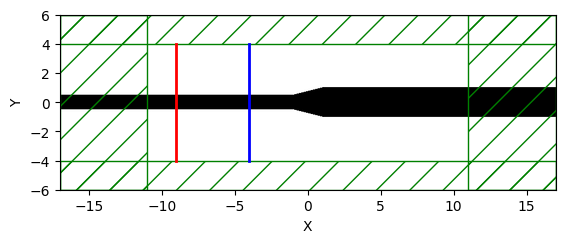

In [6]:
sim.plot2D()

In [7]:
sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,mon_pt,1e-9))

res = sim.get_eigenmode_coefficients(flux,[1],eig_parity=mp.ODD_Z+mp.EVEN_Y)
taper_coeffs = res.alpha
taper_flux = mp.get_fluxes(flux)

field decay(t = 50.02): 7.571038188081993e-08 / 7.571038188081993e-08 = 1.0
on time step 4132 (time=82.64), 0.00096819 s/step
field decay(t = 100.04): 0.0017392585992030683 / 0.0017392585992030683 = 1.0
field decay(t = 150.06): 0.45365254116438114 / 0.45365254116438114 = 1.0
on time step 8312 (time=166.24), 0.000957037 s/step
field decay(t = 200.08): 1.5537303405430607 / 1.5537303405430607 = 1.0
on time step 12469 (time=249.38), 0.000962234 s/step
field decay(t = 250.1): 1.2243056496526945 / 1.5537303405430607 = 0.7879782081263693
field decay(t = 300.12): 0.029930309813517735 / 1.5537303405430607 = 0.019263516346766117
on time step 16578 (time=331.56), 0.000973614 s/step
field decay(t = 350.14): 8.40164600744463e-06 / 1.5537303405430607 = 5.407402937441565e-06
on time step 19549 (time=390.98), 0.00136063 s/step
field decay(t = 400.16): 4.7766991612693567e-11 / 1.5537303405430607 = 3.074342462540702e-11
run 0 finished at t = 400.16 (20008 timesteps)
MPB solved for frequency_1(0.519356,0

     prism, center = (0,0,5e+19)
          height 1e+20, axis (0,0,1), sidewall angle: 0 radians, 8 vertices:
          (-18,0.5,0)
          (-1,0.5,0)
          (1,1,0)
          (18,1,0)
          (18,-1,0)
          (1,-1,0)
          (-1,-0.5,0)
          (-18,-0.5,0)
          dielectric constant epsilon diagonal = (12,12,12)


<AxesSubplot:xlabel='X', ylabel='Y'>

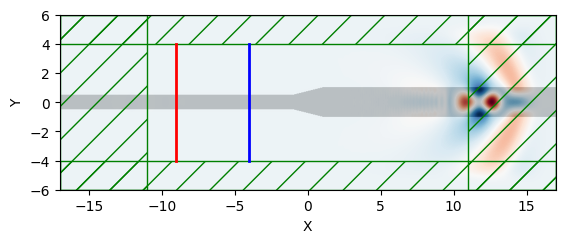

In [8]:
sim.plot2D(fields=mp.Ez)

---

In [ ]:
for Lt in Lts:
    sx = dpml_x+Lw+Lt+Lw+dpml_x
    cell_size = mp.Vector3(sx,sy,0)

    src_pt = mp.Vector3(-0.5*sx+dpml_x+0.2*Lw)
    sources = [mp.EigenModeSource(src=mp.GaussianSource(fcen,fwidth=0.2*fcen),
                                  center=src_pt,
                                  size=mp.Vector3(y=sy-2*dpml_y),
                                  eig_match_freq=True,
                                  eig_parity=mp.ODD_Z+mp.EVEN_Y)]

    # straight waveguide
    vertices = [mp.Vector3(-0.5*sx-1,0.5*w1),
                mp.Vector3(0.5*sx+1,0.5*w1),
                mp.Vector3(0.5*sx+1,-0.5*w1),
                mp.Vector3(-0.5*sx-1,-0.5*w1)]

    sim = mp.Simulation(resolution=resolution,
                        cell_size=cell_size,
                        boundary_layers=boundary_layers,
                        geometry=[mp.Prism(vertices,height=mp.inf,material=Si)],
                        sources=sources,
                        symmetries=symmetries)

    mon_pt = mp.Vector3(-0.5*sx+dpml_x+0.7*Lw)
    flux = sim.add_flux(fcen,0,1,mp.FluxRegion(center=mon_pt,size=mp.Vector3(y=sy-2*dpml_y)))

    sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,mon_pt,1e-9))

    res = sim.get_eigenmode_coefficients(flux,[1],eig_parity=mp.ODD_Z+mp.EVEN_Y)
    incident_coeffs = res.alpha
    incident_flux = mp.get_fluxes(flux)
    incident_flux_data = sim.get_flux_data(flux)

    sim.reset_meep()

    # linear taper
    vertices = [mp.Vector3(-0.5*sx-1,0.5*w1),
                mp.Vector3(-0.5*Lt,0.5*w1),
                mp.Vector3(0.5*Lt,0.5*w2),
                mp.Vector3(0.5*sx+1,0.5*w2),
                mp.Vector3(0.5*sx+1,-0.5*w2),
                mp.Vector3(0.5*Lt,-0.5*w2),
                mp.Vector3(-0.5*Lt,-0.5*w1),
                mp.Vector3(-0.5*sx-1,-0.5*w1)]

    sim = mp.Simulation(resolution=resolution,
                        cell_size=cell_size,
                        boundary_layers=boundary_layers,
                        geometry=[mp.Prism(vertices,height=mp.inf,material=Si)],
                        sources=sources,
                        symmetries=symmetries)

    flux = sim.add_flux(fcen,0,1,mp.FluxRegion(center=mon_pt,size=mp.Vector3(y=sy-2*dpml_y)))
    sim.load_minus_flux_data(flux,incident_flux_data)

    sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,mon_pt,1e-9))

    res = sim.get_eigenmode_coefficients(flux,[1],eig_parity=mp.ODD_Z+mp.EVEN_Y)
    taper_coeffs = res.alpha
    taper_flux = mp.get_fluxes(flux)

    R_coeffs.append(abs(taper_coeffs[0,0,1])**2/abs(incident_coeffs[0,0,0])**2)
    R_flux.append(-taper_flux[0]/incident_flux[0])
    print("refl:, {}, {:.8f}, {:.8f}".format(Lt,R_coeffs[-1],R_flux[-1]))

/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


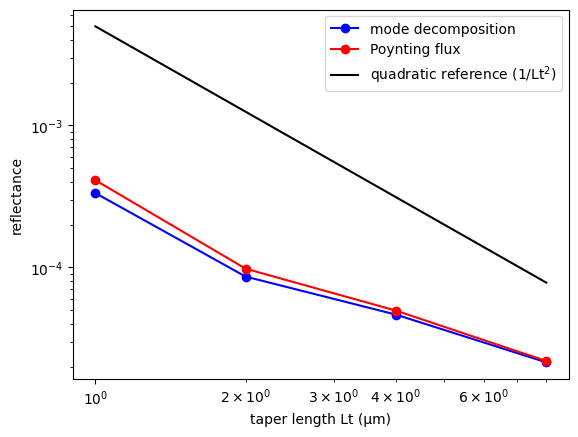

In [ ]:
if mp.am_master():
    plt.figure()
    plt.loglog(Lts,R_coeffs,'bo-',label='mode decomposition')
    plt.loglog(Lts,R_flux,'ro-',label='Poynting flux')
    plt.loglog(Lts,[0.005/Lt**2 for Lt in Lts],'k-',label=r'quadratic reference (1/Lt$^2$)')
    plt.legend(loc='upper right')
    plt.xlabel('taper length Lt (μm)')
    plt.ylabel('reflectance')
    plt.show()